<h1 style="color: blue;"><b>Sales Data Analysis Project</b></h1>

<p style="font-size:18px; font-family:Arial; color:black;">This analysis focuses on sales trends, return rates, and customer behavior based on sales channels and product categories. The insights drawn from this analysis aim to uncover key trends affecting overall sales performance and customer satisfaction.</p>

## Importing Required Libraries

<p style="font-size:18px; font-family:Arial; color:black;">The first step is to import the necessary libraries for data manipulation and visualization. I use `pandas` for data manipulation and `matplotlib`/`seaborn` for creating visualizations.</p>

In [20]:
# Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# advanced statistics Incase needed
from scipy import stats

# Setting up plot styles for Seaborn
sns.set(style="whitegrid")

## Loading the Dataset

<p style="font-size:18px; font-family:Arial; color:black;">Next, I load the sales data into a DataFrame using pandas. The dataset contains key information about sales transactions, including sales amounts, product categories, customer types, and return data.</p>

In [33]:
# Load the dataset
df = pd.read_csv('/Users/anantayafaraj/Documents/Manual Library/Python Project/sales_data.csv')

# Display the first few rows to understand the structure
df.head()

,CustomerID,Region,Sales,Discount,Date,ProductID,Quantity,Return,CustomerType,SalesChannel,PaymentMethod,SatisfactionScore,ProductCategory
0,1001,East,21708.779879,NaN,2024-02-27 03:21:48.108108104,164,16,0,VIP,Online,Credit Card,3,Electronics
1,1002,West,29380.854196,5.0,2024-05-09 22:40:43.243243240,156,22,0,New,In-Store,Bank Transfer,6,Sports
2,1003,North,24752.119191,15.0,2024-05-01 00:05:45.945945944,192,85,0,New,In-Store,Credit Card,2,Health & Beauty
3,1004,East,17115.481722,5.0,2024-08-25 20:59:49.189189184,198,54,0,Returning,Direct,Cash,10,Sports
4,1005,East,15507.926643,NaN,2024-05-31 15:48:28.108108104,139,21,0,New,In-Store,Credit Card,1,Sports


## Exploring the Dataset

<p style="font-size:18px; font-family:Arial; color:black;">Before conducting a detailed analysis, I will begin by examining the dataset's structure, reviewing each column type, and identifying any missing values.</p>

In [45]:
# Check the shape of the dataset
df.shape

(1000, 13)

In [47]:
# Check the data types
df.dtypes

CustomerID             int64
Region                object
Sales                float64
Discount             float64
Date                  object
ProductID              int64
Quantity               int64
Return                 int64
CustomerType          object
SalesChannel          object
PaymentMethod         object
SatisfactionScore      int64
ProductCategory       object
dtype: object

In [49]:
# Check for missing values
df.isnull().sum()

CustomerID             0
Region                30
Sales                 50
Discount             277
Date                   0
ProductID              0
Quantity               0
Return                 0
CustomerType           0
SalesChannel           0
PaymentMethod          0
SatisfactionScore      0
ProductCategory        0
dtype: int64

## Cleaning the Data

<p style="font-size:18px; font-family:Arial; color:black;">After exploring the data, I start by cleaning it. The cleaning process involves handling missing values, converting data types, and formatting columns to ensure consistency.</p>

### Cleaning Objectives:
1. **Round the Sales values** to two decimal places for clarity.
2. **Convert Discount values** from float to integer, as we don't need fractional values.
3. **Format the Date column** to ensure consistent date formats.
4. **Handle missing values** in the Region column by filling with 'Unknown'.
5. **Ensure the Return column remains as integers** (1 for returns, 0 for non-returns) for easier analysis.

In [59]:
#  Round sales to 2 decimal places
df['Sales'] = df['Sales'].round(2)

In [64]:
# Convert Discount to integer
df['Discount'] = df['Discount'].fillna(0).astype(int)

In [66]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
# Fill missing values in the Region column with 'Unknown'
df['Region'].fillna('Unknown', inplace=True)

In [72]:
# Check the Return column for any potential issues (keeping as integers)
df['Return'].value_counts()

Return
0    909
1     91
Name: count, dtype: int64

In [74]:
# Display the updated DataFrame to confirm the cleaning steps
df.dtypes

CustomerID                    int64
Region                       object
Sales                       float64
Discount                      int64
Date                 datetime64[ns]
ProductID                     int64
Quantity                      int64
Return                        int64
CustomerType                 object
SalesChannel                 object
PaymentMethod                object
SatisfactionScore             int64
ProductCategory              object
dtype: object

### Explanation:
- **Rounding Sales:** Rounding the Sales column to two decimal places improves readability, especially when dealing with financial data.
- **Converting Discount:** Since the Discount column doesn't need to be in float format, converting it to integer avoids unnecessary complexity.
- **Date Formatting:** Ensuring that the Date column is in datetime format makes it easier to work with during time-based analysis.
- **Handling Missing Values:** Rather than dropping rows with missing Region values, I filled them with 'Unknown', preserving the dataset's integrity while avoiding loss of data.
- **Return Column:** The Return column remains in its original integer form (1 for return, 0 for no return), allowing for straightforward calculations later in the analysis.

In [81]:
df.shape

(1000, 13)

In [83]:
df.dtypes

CustomerID                    int64
Region                       object
Sales                       float64
Discount                      int64
Date                 datetime64[ns]
ProductID                     int64
Quantity                      int64
Return                        int64
CustomerType                 object
SalesChannel                 object
PaymentMethod                object
SatisfactionScore             int64
ProductCategory              object
dtype: object

In [89]:
# Calculate the number of NaN values in each column
missing_values = df.isnull().sum()

print(missing_values)

CustomerID            0
Region                0
Sales                50
Discount              0
Date                  0
ProductID             0
Quantity              0
Return                0
CustomerType          0
SalesChannel          0
PaymentMethod         0
SatisfactionScore     0
ProductCategory       0
dtype: int64


In [92]:
# Drop rows that contain any NaN values
df_cleaned = df.dropna()

# Verify if NaN values are gone
print(df_cleaned.isnull().sum())

CustomerID           0
Region               0
Sales                0
Discount             0
Date                 0
ProductID            0
Quantity             0
Return               0
CustomerType         0
SalesChannel         0
PaymentMethod        0
SatisfactionScore    0
ProductCategory      0
dtype: int64


In [95]:
# Check the shape of the cleaned DataFrame
print(df_cleaned.shape)

(950, 13)


### Just a quick look at the data again

In [103]:
df.head(10)

,CustomerID,Region,Sales,Discount,Date,ProductID,Quantity,Return,CustomerType,SalesChannel,PaymentMethod,SatisfactionScore,ProductCategory
0,1001,East,21708.78,0,2024-02-27 03:21:48.108108104,164,16,0,VIP,Online,Credit Card,3,Electronics
1,1002,West,29380.85,5,2024-05-09 22:40:43.243243240,156,22,0,New,In-Store,Bank Transfer,6,Sports
2,1003,North,24752.12,15,2024-05-01 00:05:45.945945944,192,85,0,New,In-Store,Credit Card,2,Health & Beauty
3,1004,East,17115.48,5,2024-08-25 20:59:49.189189184,198,54,0,Returning,Direct,Cash,10,Sports
4,1005,East,15507.93,0,2024-05-31 15:48:28.108108104,139,21,0,New,In-Store,Credit Card,1,Sports
5,1006,Unknown,22459.60,15,2024-08-11 19:47:44.864864864,113,72,0,New,Online,Credit Card,1,Home & Kitchen
6,1007,North,13398.83,0,2024-08-19 11:43:25.405405400,134,16,1,New,Direct,Cash,5,Books
7,1008,North,29157.29,5,2024-04-06 02:19:49.189189184,147,59,0,Returning,Online,Cash,4,Books
8,1009,East,25897.20,15,2023-01-16 07:51:21.081081081,183,31,0,New,Direct,Credit Card,1,Toys
9,1010,South,17654.12,5,2024-05-29 02:29:54.594594592,155,42,0,VIP,Direct,Cash,4,Sports


In [105]:
df.shape

(1000, 13)

In [107]:
df.dtypes

CustomerID                    int64
Region                       object
Sales                       float64
Discount                      int64
Date                 datetime64[ns]
ProductID                     int64
Quantity                      int64
Return                        int64
CustomerType                 object
SalesChannel                 object
PaymentMethod                object
SatisfactionScore             int64
ProductCategory              object
dtype: object

In [119]:
# Drop rows with NaN values in 'Sales' or 'Region'
df_cleaned = df.dropna(subset=['Sales', 'Region'])
df.shape

(1000, 13)

In [122]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [130]:
# Fill NaN values in 'Region' with 'Unknown'
df['Region'].fillna('Unknown', inplace=True)

In [132]:
# Check unique values in categorical columns
print(df['Region'].unique())
print(df['CustomerType'].unique())
print(df['SalesChannel'].unique())

['East' 'West' 'North' 'Unknown' 'South']
['VIP' 'New' 'Returning']
['Online' 'In-Store' 'Direct']


# Analyzing Monthly Sales Trends

<p style="font-size:18px; font-family:Arial; color:black;">After cleaning the dataset, the first thing I wanted to do was get a sense of how sales have been trending over time. By grouping the data by month and summing up the sales, we can easily spot any patterns, like seasonal fluctuations or dips in performance. This is especially important to understand if there was a specific time when sales started dropping.</p>

### Objective:
- **Understand monthly sales patterns**: This will help us see if there are any clear trends or unusual changes in sales performance.
- **Visualize the sales timeline**: A simple line graph can give us a better picture of how sales evolved over time and help identify when things started going wrong.

In [147]:
# Group sales by month and sum them
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()

In [149]:
# Display the first few rows of monthly sales
print(monthly_sales.head())

Date
2023-01    1030236.28
2023-02    1034260.86
2023-03     803123.90
2023-04     851551.75
2023-05     948769.41
Freq: M, Name: Sales, dtype: float64


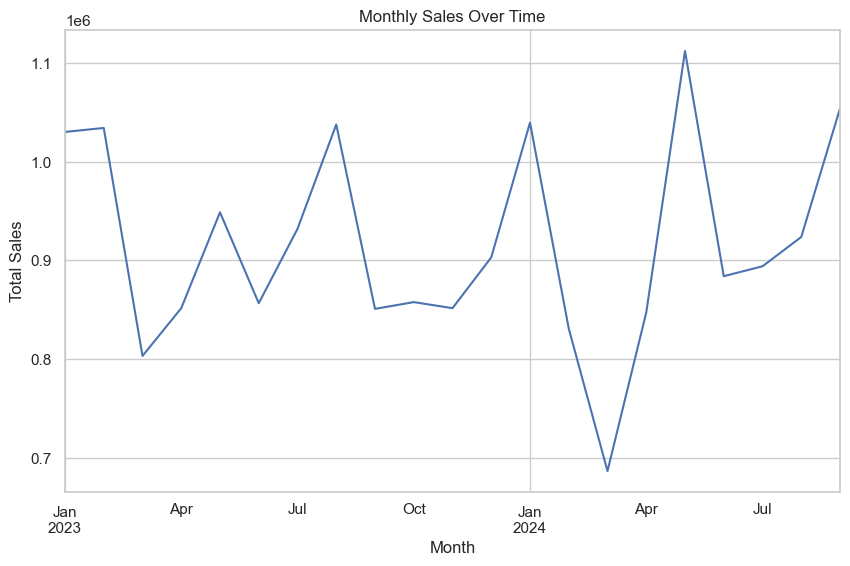

In [151]:
# Plot the sales over time (monthly)
monthly_sales.plot(
    kind='line', 
    title='Monthly Sales Over Time', 
    xlabel='Month', 
    ylabel='Total Sales', 
    figsize=(10, 6))

# Show the plot
plt.show()


<p style="font-size:18px; font-family:Arial; color:black;">Looking at the line chart, we can see that sales were fairly stable for a while, but there’s a noticeable dip starting in early 2024. This confirms that something happened in the first few months of the year that caused sales to drop off, which needs further investigation.</p>

## Comparing Early 2023 and Early 2024 Sales

<p style="font-size:18px; font-family:Arial; color:black;">Once I had a good understanding of the overall sales trends, the next logical step was to compare sales performance between **early 2023** and **early 2024**. Why? Because we’re specifically concerned about the drop in sales in 2024, and looking at the same time period from the previous year will give us valuable context.</p>

### Why this Matters:

<p style="font-size:18px; font-family:Arial; color:black;">By comparing sales from January to April in both 2023 and 2024, we can see if the decline is an outlier or part of a larger trend. If sales were strong in early 2023 but dropped off sharply in early 2024, then we know something specific happened this year that needs to be addressed.</p>

In [165]:
# Filter the data for January to April 2024
early_2024_sales = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-04-30')]

# Filter the data for January to April 2023
early_2023_sales = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-04-30')]

# Group by month and sum sales
early_2024_sales_grouped = early_2024_sales.groupby(early_2024_sales['Date'].dt.to_period('M'))['Sales'].sum()
early_2023_sales_grouped = early_2023_sales.groupby(early_2023_sales['Date'].dt.to_period('M'))['Sales'].sum()

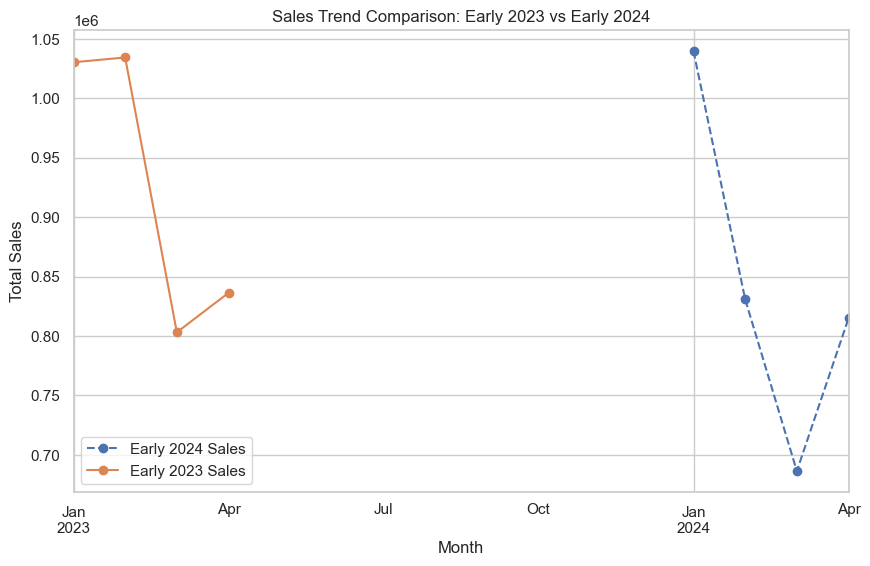

In [168]:
# Plot both for comparison
plt.figure(figsize=(10,6))

early_2024_sales_grouped.plot(
    kind='line', 
    label='Early 2024 Sales', 
    linestyle='--', 
    marker='o')
early_2023_sales_grouped.plot(
    kind='line', 
    label='Early 2023 Sales', 
    linestyle='-', 
    marker='o')
plt.title('Sales Trend Comparison: Early 2023 vs Early 2024')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


<p style="font-size:18px; font-family:Arial; color:black;">The comparison chart shows that sales in early 2024 are consistently lower than in early 2023. The decline is gradual but noticeable, especially around March and April 2024, where the sales gap between the two years widens. This suggests a steady drop rather than a sudden event, meaning there might be ongoing issues affecting performance in 2024.</p>

## Analyzing Sales by Product Category (2023 vs. 2024)

<p style="font-size:18px; font-family:Arial; color:black;">Now that I've seen an overall drop in sales in 2024 compared to 2023, the next step is to break this down by product category. This will help me see if certain product categories, like Electronics, Clothing, or Toys, are performing worse in 2024 than in 2023.</p>

### The goal is to:

1. **Identify which product categories** are seeing the biggest decline in sales.
2. **Spot any patterns** in product performance, which will give us clues as to why the overall sales might be dropping.

<p style="font-size:18px; font-family:Arial; color:black;">By comparing sales by product category for early 2023 vs. early 2024, I can figure out if specific products are the root cause of the sales decline.</p>

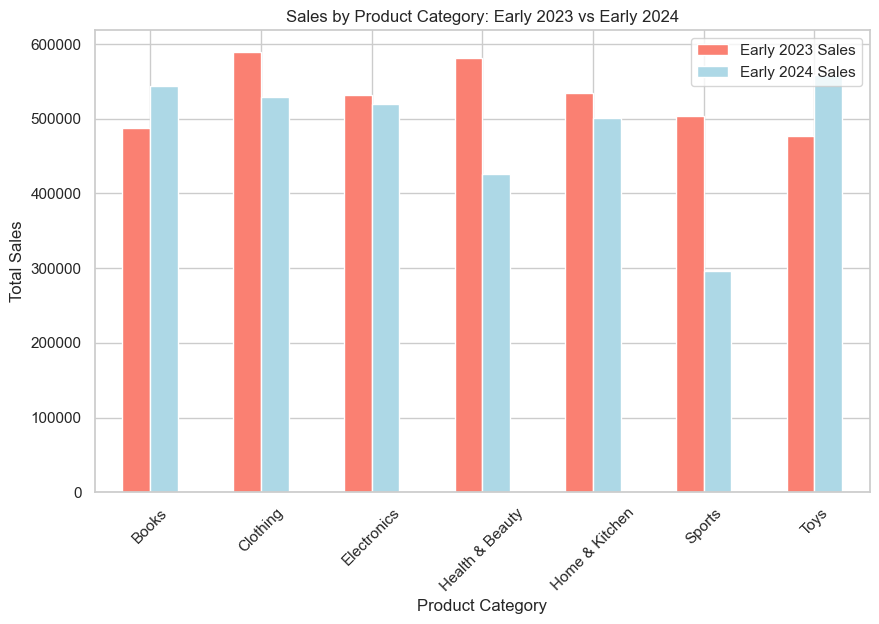

In [197]:
# Combine both early 2023 and early 2024 sales into one DataFrame for better comparison
category_sales_comparison = pd.DataFrame({
    'Early 2023 Sales': category_2023_sales,
    'Early 2024 Sales': category_2024_sales
})

# Plot side-by-side bars for clearer comparison
category_sales_comparison.plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Sales by Product Category: Early 2023 vs Early 2024')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<p style="font-size:18px; font-family:Arial; color:black;">The side-by-side comparison makes it clear that Electronics, Health & Beauty, and Sports experienced significant drops in sales in 2024 compared to 2023. On the other hand, Books and Toys remained relatively stable. This suggests that underperformance in specific categories may be contributing to the overall sales decline.</p>

## Analyzing Sales by Sales Channel (2023 vs. 2024)

<p style="font-size:18px; font-family:Arial; color:black;">Once I had an understanding of how product categories were performing, the next step is to look at how sales channels are doing. I want to compare sales performance between **early 2023** and **early 2024** across different channels to see if one of them is driving the overall decline in sales.</p>

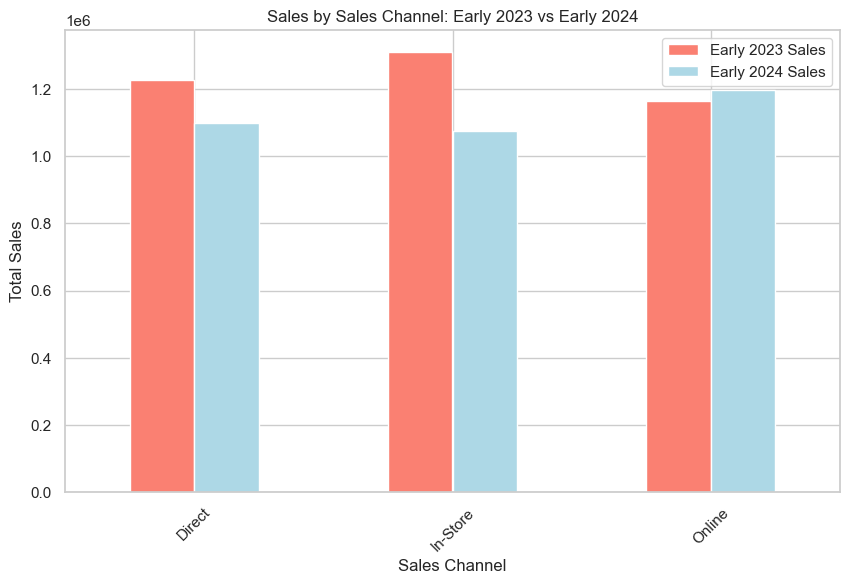

In [207]:
# Group by SalesChannel and sum the sales for early 2023 and early 2024
channel_2023_sales = early_2023_sales.groupby('SalesChannel')['Sales'].sum()
channel_2024_sales = early_2024_sales.groupby('SalesChannel')['Sales'].sum()

# Combine both early 2023 and early 2024 sales into one DataFrame for better comparison
channel_sales_comparison = pd.DataFrame({
    'Early 2023 Sales': channel_2023_sales,
    'Early 2024 Sales': channel_2024_sales
})

# Plot side-by-side bars for clearer comparison
channel_sales_comparison.plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Sales by Sales Channel: Early 2023 vs Early 2024')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<p style="font-size:18px; font-family:Arial; color:black;">It’s clear from the chart that sales across all channels <b>Direct</b>, <b>In-Store</b>, and <b>Online</b>—have dropped in 2024 compared to 2023. The most noticeable decline is in **In-Store sales**, which could indicate a shift in consumer behavior or external factors affecting brick-and-mortar sales. However, **Online sales** show a smaller decrease, which might suggest that the online channel is performing better relative to the others, though still not as strong as 2023.</p>

# #Investigating Return Rates by Product Category

<p style="font-size:18px; font-family:Arial; color:black;">After looking into the sales performance by channel, the next logical step is to analyze <b>return rates</b> for each product category. High return rates can negatively affect sales, and identifying which product categories have higher returns will help us understand if this is contributing to the overall sales decline.</p>

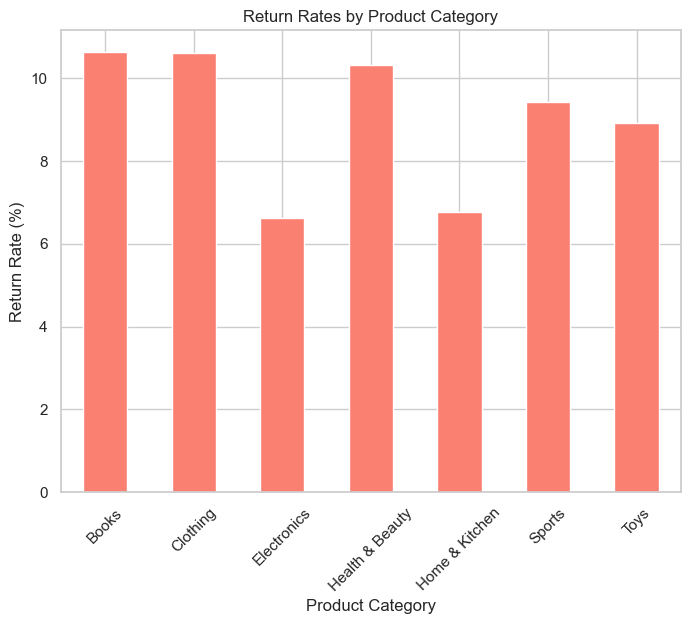

In [213]:
# Group data by ProductCategory to calculate return rates for each category
return_rate_by_category = df.groupby('ProductCategory')['Return'].mean() * 100

# Plot a bar chart to visualize return rates by product category
plt.figure(figsize=(8,6))
return_rate_by_category.plot(kind='bar', color='salmon', title='Return Rates by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()


<p style="font-size:18px; font-family:Arial; color:black;">The chart reveals that **Clothing**, **Books**, and **Health & Beauty** have the highest return rates, all hovering around 10%. On the other hand, **Electronics** and **Home & Kitchen** have lower return rates, closer to 6%. High return rates in certain categories, like **Clothing** and **Books**, could be negatively impacting overall sales, suggesting a potential area for further investigation.</p>

## Investigating Return Rates by Sales Channel

<p style="font-size:18px; font-family:Arial; color:black;">Now that I’ve identified product categories with high return rates, it’s time to analyze how return rates differ across the <b>Sales Channels</b>. This will help pinpoint whether a particular channel, such as <b>Online</b>, <b>In-Store</b>, or <b>Direct</b>, is experiencing higher returns, which could be a factor behind the sales decline.</p>

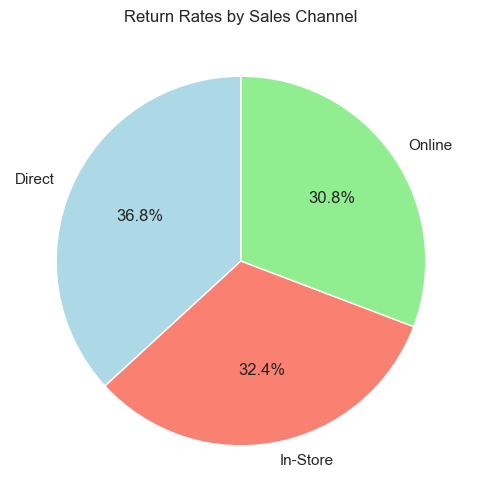

In [221]:
# Group data by SalesChannel to calculate return rates for each channel
return_rate_by_channel = df.groupby('SalesChannel')['Return'].mean() * 100

# Plot a pie chart to visualize return rates by sales channel
plt.figure(figsize=(8,6))
plt.pie(return_rate_by_channel, labels=return_rate_by_channel.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Return Rates by Sales Channel')
plt.show()

<p style="font-size:18px; font-family:Arial; color:black;">From the pie chart, I can see that <b>Direct Sales</b> has the highest return rate at 36.8%, followed by <b>In-Store Sales</b> at 32.4%, and <b>Online Sales</b> at 30.8%. This suggests that returns are relatively high across all channels, with <b>Direct Sales</b> facing the most significant challenges in terms of returns. This might warrant a deeper investigation into the reasons why returns are particularly high in direct sales.</p>

## Investigating Sales Trends by Region

<p style="font-size:18px; font-family:Arial; color:black;">The next step in the analysis is to break down sales performance by region. By doing so, I can determine if certain regions are underperforming or overperforming. This insight will help identify potential regional issues or opportunities for growth.</p>

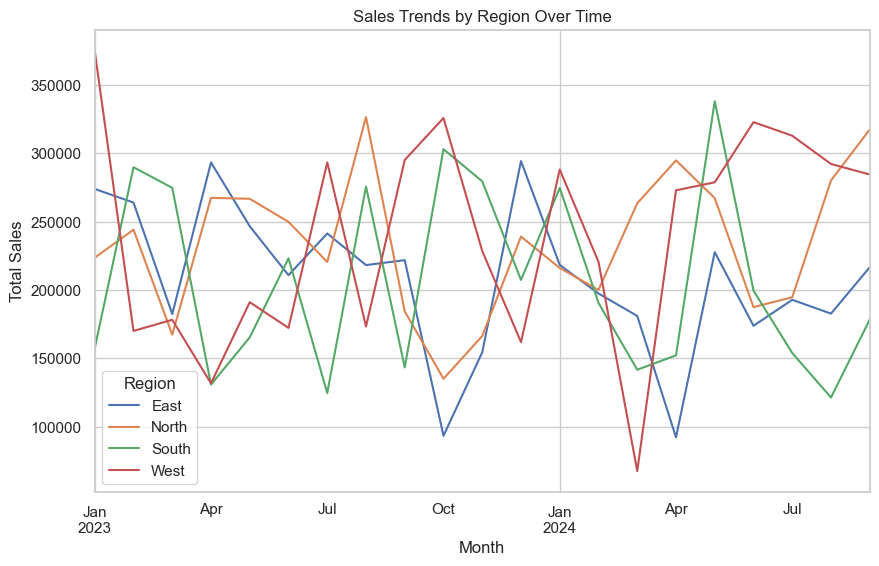

In [235]:
# Filter out 'Unknown' from the 'Region' column
filtered_df = df[df['Region'] != 'Unknown']

# Group sales by region and month to analyze trends over time, excluding 'Unknown'
regional_sales_over_time = filtered_df.groupby([filtered_df['Date'].dt.to_period('M'), 'Region'])['Sales'].sum().unstack()

# Plot the trends for each region over time
regional_sales_over_time.plot(kind='line', figsize=(10,6), title='Sales Trends by Region Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

<p style="font-size:18px; font-family:Arial; color:black;">The regional sales trends show significant variability across all regions, with no single region consistently outperforming others. However, the <b>North</b> and <b>West</b> regions appear to have more frequent peaks in sales, while the <b>East</b> and <b>South</b> regions show more fluctuations and dips. This suggests that certain regions may be more volatile in terms of sales, potentially pointing to region-specific factors affecting performance.</p>

## Product Category Performance Analysis Over Time

<p style="font-size:18px; font-family:Arial; color:black;">Now that I have a good understanding of regional sales trends, it's important to dive into sales trends by <b>Product Category</b>. This will allow me to determine which categories are driving overall sales and if certain categories are experiencing a drop in sales.</p>

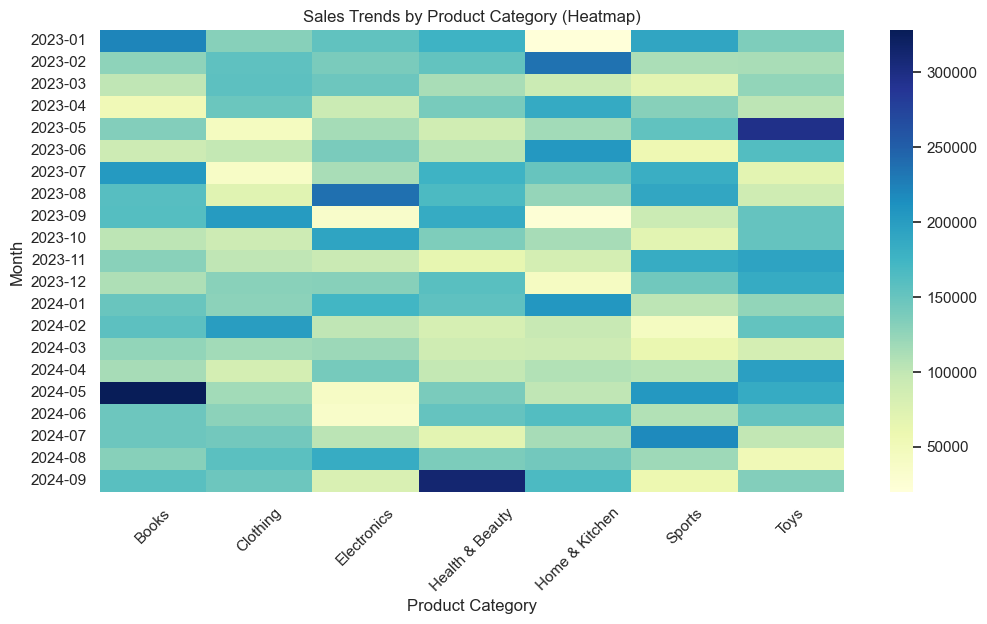

In [249]:
# Create a pivot table for the heatmap
category_sales_heatmap = df.groupby([df['Date'].dt.to_period('M'), 'ProductCategory'])['Sales'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(category_sales_heatmap, cmap="YlGnBu", annot=False)
plt.title('Sales Trends by Product Category (Heatmap)')
plt.ylabel('Month')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

<p style="font-size:18px; font-family:Arial; color:black;"> The heatmap reveals that certain categories, like <b>Books</b> and <b>Toys</b>, have consistent performance throughout 2023 and early 2024, with notably higher sales during certain months, represented by the darker shades. However, categories like <b>Sports</b> and <b>Electronics</b> show much more variability, with some months performing significantly better than others. Interestingly, May 2024 shows a spike in the <b>Sports</b> category, while <b>Health & Beauty</b> appears strong in earlier months but drops in others. This fluctuation across categories could be contributing to the overall sales challenges the company is facing, particularly in less stable categories.</p>

## Investigating the Impact of Discounts on Sales

<p style="font-size:18px; font-family:Arial; color:black;">Now that I’ve explored sales trends by region, channel, and product category, the next step is to analyze the impact of <b>discounts</b> on sales. By examining the relationship between discount levels and total sales, I can assess whether applying certain discounts is effectively driving sales or if it may be leading to reduced revenue.</p>

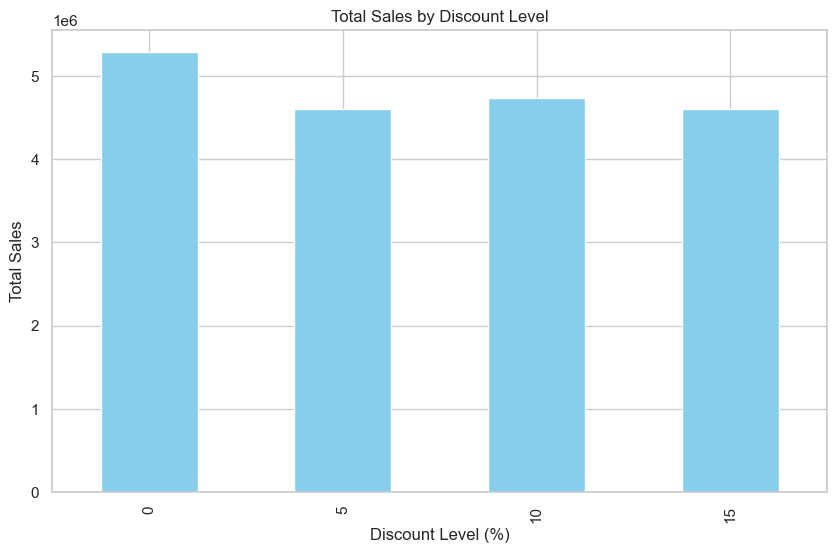

In [257]:
# Group sales by discount level and sum them
sales_by_discount = df.groupby('Discount')['Sales'].sum()

# Plot sales by discount level
plt.figure(figsize=(10,6))
sales_by_discount.plot(kind='bar', color='skyblue', title='Total Sales by Discount Level')
plt.xlabel('Discount Level (%)')
plt.ylabel('Total Sales')
plt.show()

<p style="font-size:18px; font-family:Arial; color:black;">This chart reveals that sales without any discount (0%) generate the highest total sales, while sales with increasing discounts (from 5% to 15%) show a gradual decline in revenue. This suggests that while discounts may attract some customers, they do not appear to significantly boost overall sales volume and could be eating into revenue without much benefit.</p>

## Investigating Customer Satisfaction

<p style="font-size:18px; font-family:Arial; color:black;">Finally, it's essential to examine the relationship between customer satisfaction scores and sales. High satisfaction can lead to repeat business and increased sales, while lower satisfaction may indicate underlying issues that could be driving sales down. I'll investigate how satisfaction levels correlate with sales performance.</p>

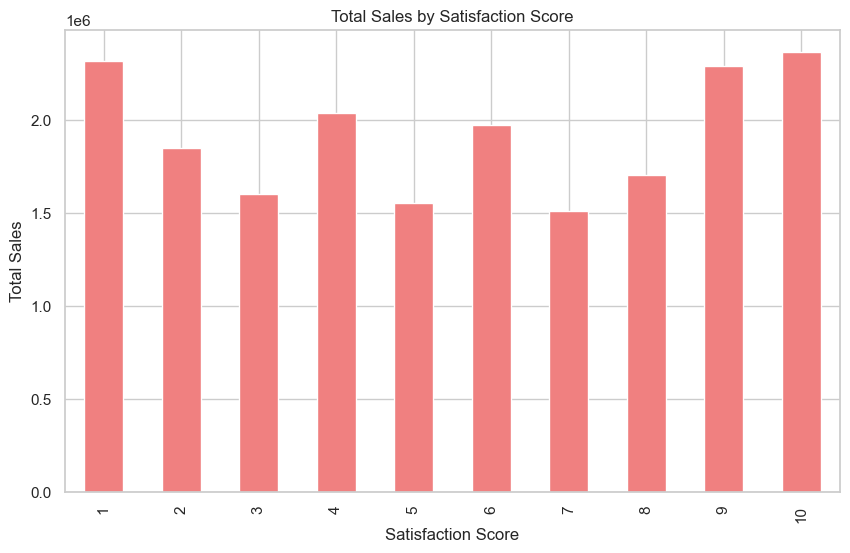

In [264]:
# Group sales by satisfaction score and sum them
sales_by_satisfaction = df.groupby('SatisfactionScore')['Sales'].sum()

# Plot sales by satisfaction score
plt.figure(figsize=(10,6))
sales_by_satisfaction.plot(kind='bar', color='lightcoral', title='Total Sales by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Total Sales')
plt.show()


<p style="font-size:18px; font-family:Arial; color:black;">This chart shows that customers with both high (9 and 10) and low satisfaction scores (1) tend to generate the highest total sales, while mid-range satisfaction scores (between 3 and 6) correspond to lower sales. This may indicate that customers who are extremely satisfied or dissatisfied are making larger purchases or are more frequent buyers. This pattern suggests that focusing on improving satisfaction among moderately satisfied customers could potentially boost sales further.</p>

# Conclusion and Final Recommendations

<p style="font-size:18px; font-family:Arial; color:black;">In conclusion, the analysis reveals that while the company is seeing sales, several challenges are contributing to a decline in overall performance. High return rates, especially in specific product categories like <b>Clothing</b> and <b>Health & Beauty</b>, are significantly affecting revenues. Additionally, discount strategies appear to reduce overall sales instead of boosting them. A key focus should be on optimizing product returns and reviewing discount strategies to strike a balance between attracting customers and maintaining profitability. The customer satisfaction analysis further reveals that targeting moderately satisfied customers for improvements could yield better sales results.</p>